## Data Analysis

Answer the following questions with a visualization if appropriate:

* How many rows and columns?
  26,106 rows and 17 columns
  
* What is the correlation between the variables and the price? (Why might that be?)
  
* How are variables correlated to each other? (Why?)
  
* Which variables have the greatest influence on the price? 
  
* Which variables have the least influence on the price? 
  
* How many qualitative and quantitative variables are there? 12 quantitative and 5 qualitative (commune, province, subtype of property, building_condition, equipped_kitchen)
  
* How would you transform these values into numerical values?
  * commune                     -> ?
  * province                    -> ?
  * subtype of property         -> label encoding (ordinal)
  * building_condition          -> label encoding (ordinal)
  * equipped_kitchen           -> binary to 1 or 0 
  
* Percentage of missing values per column?  0 ?

In [42]:
# Import necessary libraries
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick

In [3]:
# Import cleaned dataset
df = pd.read_csv("cleaned-data.csv")

In [ ]:
df.shape
# The 18th column with simplified property subtype has been added to raw data

(26106, 18)

In [5]:
# Count quantitative (numerical) variables
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns
num_quantitative = len(quantitative_vars)

# Count qualitative (categorical) variables
qualitative_vars = df.select_dtypes(include=['object', 'category']).columns
num_qualitative = len(qualitative_vars)

print(f"Quantitative variables: {num_quantitative}")
print(f"Qualitative variables: {num_qualitative}")

print(f"Qualitative variables: {qualitative_vars}")

Quantitative variables: 12
Qualitative variables: 6
Qualitative variables: Index(['commune', 'province', 'subtype_of_property', 'building_condition',
       'equipped_kitchen', 'sub_property_group_encoded'],
      dtype='object')


In [7]:
# Extract unique values for each column
unique_values = pd.DataFrame({col: [df[col].unique()] for col in df.columns})

unique_values

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,sub_property_group_encoded
0,"[2600, 2100, 2660, 1180, 2018, 1050, 2160, 285...","[Berchem, Deurne, Hoboken, Uccle, Antwerpen, I...","[Antwerpen, Bruxelles, West-Vlaanderen, Oost-V...","[0, 1]","[apartment, penthouse, flat studio, ground flo...","[149000.0, 248000.0, 229000.0, 470000.0, 48000...","[good, to renovate, no info, to restore]","[2.0, 3.0, 4.0, 1.0, 5.0, 15.0, 6.0]","[48, 91, 100, 179, 116, 150, 99, 125, 90, 110,...","[installed, not installed, equipped]","[1, 3, 2, 4, 0, 8, 5, 6, 7, 16, 10, 13, 9, 12,...","[0, 1]","[0, 1]","[0, 1]","[9, 2, 26, 10, 7, 1, 4, 13, 14, 8, 25, 19, 12,...","[0, 18, 29, 70, 100, 5, 90, 33, 300, 35, 280, ...","[0, 1481, 606, 185, 268, 604, 94, 553, 136, 66...","[apartments, houses, other, luxury_properties,..."


#### Color Palette for data visualization:

#ffffff
#ececf3  *
#cbcbeb
#9d9de4
#8382d1  *
#615edb  *
#2d3880

### Outliers

In [9]:
# Adding price value counts column for graphing
df['prices_count'] = df.groupby('price')['price'].transform('count')

[Text(0, 0.5, 'Density')]

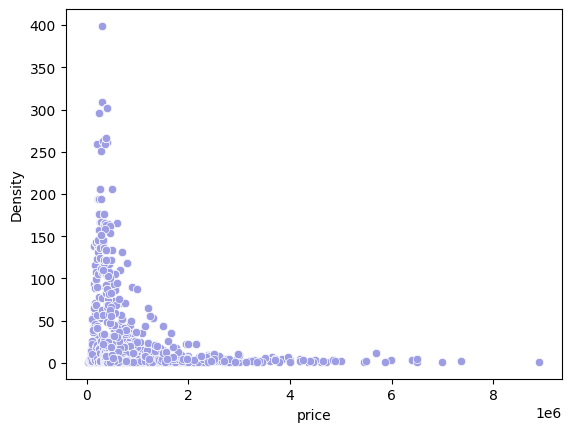

In [ ]:
# Creating scatterplot of price value count
graph1 = sns.scatterplot(data=df, x='price', y='prices_count', color='#9d9de4')
graph1.set(ylabel='Density')

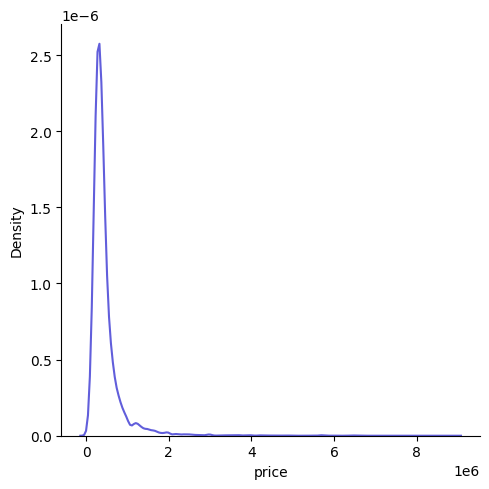

In [11]:
# Distribution plot for same relation
graph2 = sns.displot(data=df, x='price', color='#615edb', kind="kde")

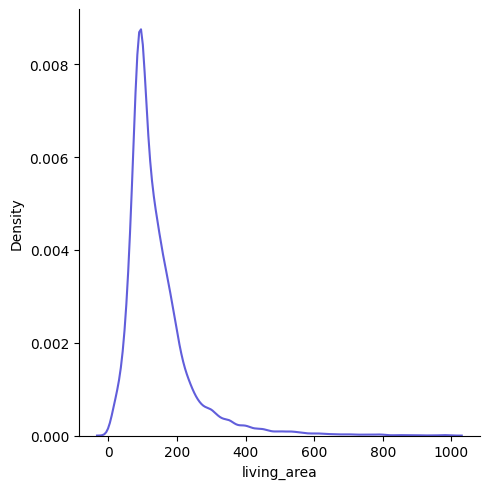

In [ ]:
# Checking for distribution of living area values, graph will not be used in presentation
sns.displot(data=df, x='living_area', color='#615edb', kind="kde")

#### Takeaways:
* Datapoints are highly concentrated
* Outliers are real events on real estate market and they not affect the analysis outcomes significantly
* Outliers will be kept for general analysis
* Outliers can be easily excluded in future, more scoped treatement of dataset

### Transformation of Qualitative Features

#### **Numerical encoding of categorical features ('best' = highest number)**

* 'province'
* 'subtype_of_property'
* 'building_condition'
* 'equipped_kitchen'

##### Provinces

In [16]:
# Numerical encoding of provinces based on average price per sqm (11 = most expensive)

province_mapping = {
    'Bruxelles': 11,
    'West-Vlaanderen': 10,
    'Vlaams Brabant': 9,
    'Antwerpen': 8,
    'Brabant Wallon': 7,
    'Limburg': 6,
    'Oost-Vlaanderen': 5,
    'Namur': 4,
    'Liège': 3,
    'Luxembourg': 2,
    'Hainaut': 1
}

# Apply the mapping
df['province_encoded'] = df['province'].map(province_mapping)


##### Type of property (Ordinal encoding based on mean price per subtype: 5 - most expensive)

* 1 (Apartments): 'apartment', 'flat studio', 'penthouse', 'ground floor', 'loft', 'kot'
* 2 (Houses): 'house', 'bungalow', 'town house', 'manor house', 'duplex', 'triplex'
* 3 (Other): 'other property', 'mixed use building', 'service flat', 'apartment block'
* 4 (Rural): 'country cottage', 'farmhouse', 'chalet'
* 5 (Luxury Properties): 'mansion', 'castle', 'exceptional property', 'villa'

In [19]:
# Define grouped mapping with assigned numbers
property_group_mapping = {
    'apartment': 1, 'flat studio': 1, 'penthouse': 1, 'ground floor': 1, 'loft': 1, 'kot': 1, 'triplex': 2, 'duplex': 2, 'house': 2, 'bungalow': 2, 'town house': 2, 'manor house': 2, 'mixed use building': 3, 'service flat': 3, 'other property': 3, 'apartment block': 3, 'country cottage': 4, 'farmhouse': 4, 'chalet': 4, 'villa': 5, 'mansion': 5, 'castle': 5, 'exceptional property': 5
}

# Apply the grouped mapping to the column
df['sub_property_group_numeric'] = df['subtype_of_property'].map(property_group_mapping)

##### Building Condition

In [20]:
# Define the mapping based on condition quality
building_condition_mapping = {
    'good': 3,
    'no info': 2,
    'to renovate': 1,
    'to restore': 0
}

# Apply the mapping
df['building_condition_encoded'] = df['building_condition'].map(building_condition_mapping)

##### Equipped Kitchen

In [21]:
# Binary encoding of kitchen
df['equipped_kitchen_binary'] = df['equipped_kitchen'].apply(lambda x: 1 if x == 'equipped' else 0)

##### Terrace

We had many properties with confirmed terrace but without indication of terrace surface, we thus decided to encode as binary (with or without terrace)

In [22]:
# Encode terrace as binary (Create new column)
df['terrace_binary'] = df['terrace'].apply(lambda x: 1 if x >= 1 else 0)

In [23]:
# Convert facade number to int
df['facade_number'] = df['facade_number'].astype(int)

### Exploring Correlations Between All Features

#### Generating Correlation Heat Maps

##### Colour Palette

In [26]:
# Define your custom colors
custom_colors = ['#ececf3', '#cbcbeb', '#9d9de4', '#8382d1', '#615edb', '#464F96', '#2d3880']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

##### Custom Labels

In [27]:
# Custom labels for features
custom_labels = {
    'type_of_property': 'Property Type',
    'facade_number': 'Facade Count',
    'living_area': 'Living Area (sqm)',
    'bedroom_nr': 'Bedrooms',
    'swimming_pool': 'Swimming Pool',
    'furnished': 'Furnished',
    'open_fire': 'Open Fire',
    'terrace': 'Terrace',
    'garden': 'Garden',
    'plot_surface': 'Plot Surface (sqm)',
    'province_encoded': 'Province',
    'sub_property_group_numeric': 'Property Subtype',
    'equipped_kitchen_binary': 'Equipped Kitchen',
    'building_condition_encoded': 'Building Condition',
}

##### Correlation Matrix (Houses & Apartments Combined)

In [29]:
# Show quantitative (numerical) variables
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns
quantitative_vars

Index(['zip_code', 'type_of_property', 'price', 'living_area', 'bedroom_nr',
       'swimming_pool', 'furnished', 'open_fire', 'terrace', 'garden',
       'plot_surface', 'prices_count', 'province_encoded',
       'sub_property_group_numeric', 'building_condition_encoded',
       'equipped_kitchen_binary', 'terrace_binary'],
      dtype='object')

In [31]:
# Create new df for only numerical values
num_df_columns = ['type_of_property', 'sub_property_group_numeric', 'price', 'facade_number', 'living_area', 'bedroom_nr', 'building_condition_encoded', 'equipped_kitchen_binary', 'furnished', 'swimming_pool', 'open_fire', 'terrace', 'garden', 'plot_surface', 'province_encoded']

num_df = df[num_df_columns]

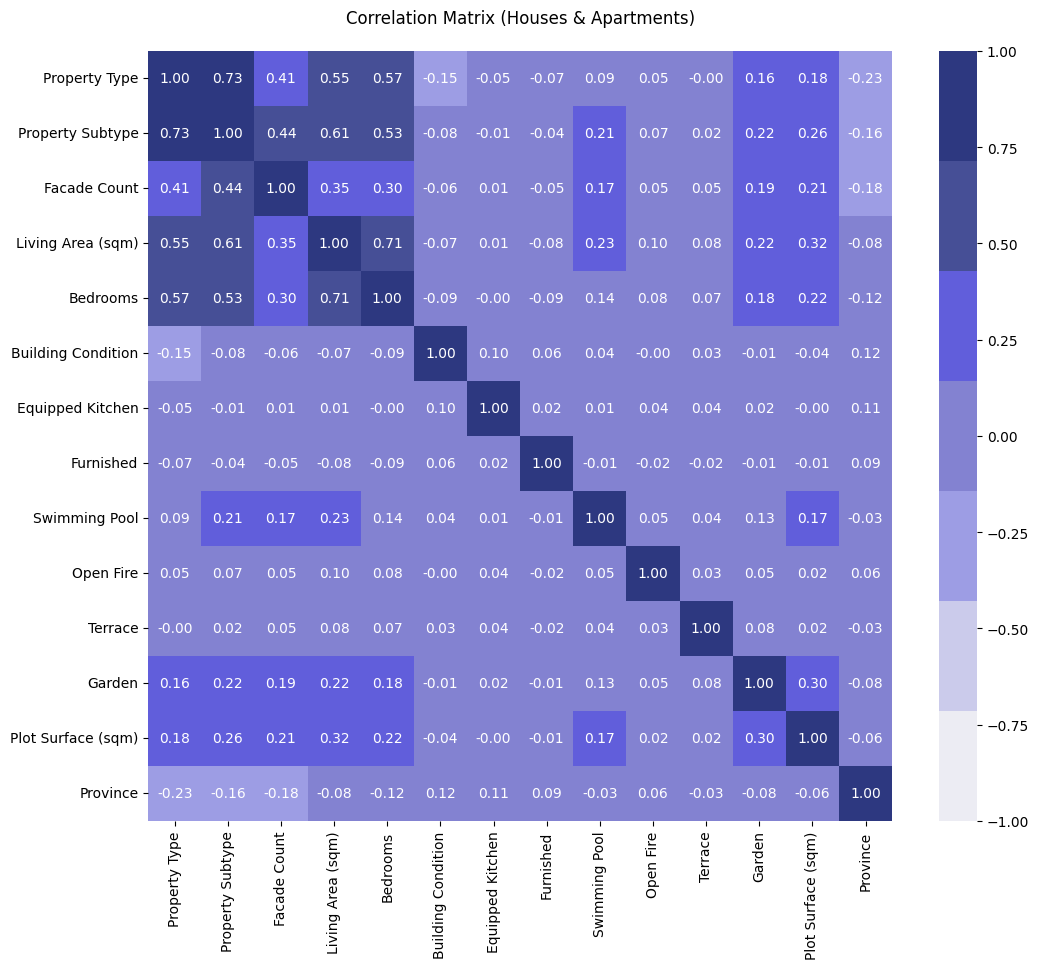

In [32]:
# Correlation matrix houses and apartments combined (excluding price)

# Excluding price
corr_features = num_df.corr().drop(index=['price'], columns=['price']).rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_features, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Houses & Apartments)", pad=20)
plt.show()

#### Calculating Correlations for Houses and Apartments Separately

Separate computation of correlation matrix for houses and apartments each because they have fundamentally different features and pricing dynamics. Combining them could lead to misleading correlations (e.g., gardens or plot size mattering for houses but not for apartments) and obscure trends unique to each type. Analyzing them separately ensures more meaningful insights, avoids irrelevant comparisons, and improves the accuracy of any models or conclusions drawn

##### Correlation Matrix for Houses

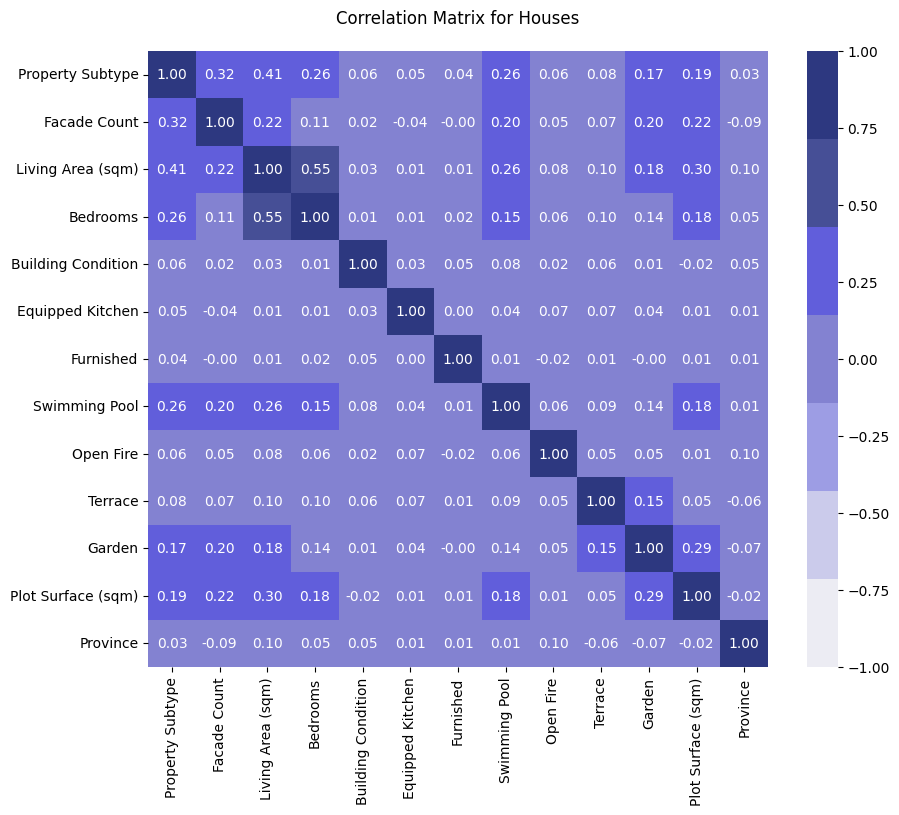

In [33]:
# Computing correlations for houses and apartments separately (excluding price)

# Filter the DataFrame for houses
corr_houses = num_df[num_df['type_of_property'] == 1].corr() \
            .drop(index=['type_of_property', 'price'], columns=['type_of_property', 'price']) \
            .rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(10, 8))
graph3 = sns.heatmap(corr_houses, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Houses", pad=20)
plt.show()

**Evaluation of Correlations Between Features for Houses**

* Strong Relationships:
  * Living area & bedrooms (0.59): larger living areas come with more bedrooms
  * Property subtype & living area (0.41): we labeled subtypes based on price, thus more expensive subtypes tend to be bigger
  * Property subtype & facade count (0.31): The more expensive the subtype, the more facades
  * Plot surface & living area and 
  * Plot surface & garden (0.29): larger plots coincide often with larger living areas and are more likely to have gardens
  
* Other:
  * Swimming Pool & garden show some correlation with subtype and size of the property

* Weak or Negligible Relationships:
  * Furnished has an overall weak correlation with most other variables, suggesting this feature to be less likely for houses.
  * Province has slight negative correlations with features like Garden and Terrace, possibly hinting at regional trends.
  
-> The strong correlations align with real-world expectations (e.g. larger properties have more bedrooms, larger plots often include gardens). This consistency indicates that our data as well as our feature encoding and computation is logical (quality of our dataset, encoding and computation)

##### Correlation Matrix for Apartments

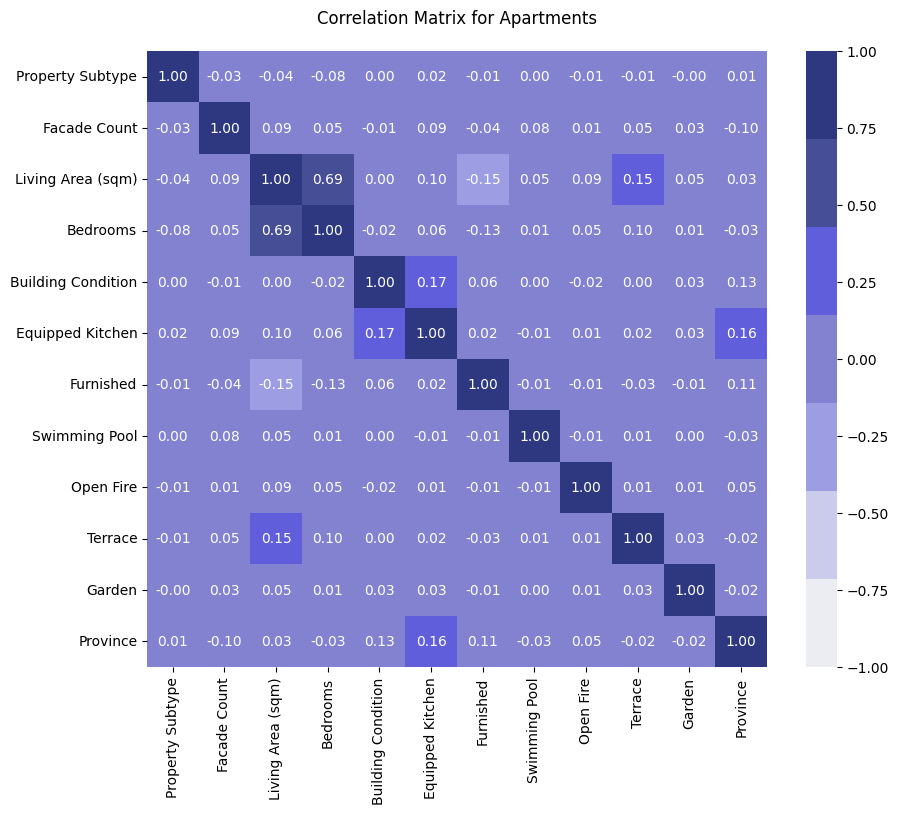

In [34]:
# Filter the DataFrame for apartments (excluding price)
# \ allows to break up the code across lines
corr_apartments = num_df[num_df['type_of_property'] == 0].corr() \
    .drop(index=['type_of_property', 'plot_surface', 'price'], columns=['type_of_property', 'plot_surface', 'price']) \
    .rename(index=custom_labels, columns=custom_labels)

plt.figure(figsize=(10, 8))
graph4 = sns.heatmap(corr_apartments, annot=True, cmap=custom_cmap, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Apartments", pad=20)
plt.show()

**Evaluation of Correlations Between Features for Apartments**

* Lower overall correlations.
  * The correlations in the apartment matrix are generally weaker compared to those for houses.
  * Less features with clear correlations

* Strong Correlation:
  * Living area and bedrooms (0.69): stronger than for houses with 0.54 -> apartments are more likely to have more rooms when they are bigger
  
* Slight Correlation:
  * Building condition and equipped kitchen (0.17): we can imagine that renovated apartments may come with equipped kitchen
  * Living area and terrace (0.15): larger apartments tend to come with terrace more than smaller ones -> for houses terrace is mostly related to garden
  
* Weak or No Correlation for Certain Features:
  * Garden, Swimming Pool, and Open Fire: have very weak to sometimes negative correlations with other features, highlighting that these features are rather unlikely for apartments

* Zero or Negative Correlations:
  * Living area and furnished (-0.14): For smaller apartments it's more likely to be furnished
  

Summary:

* Houses tend to have stronger correlations between features due to the presence of attributes like gardens, facades, and larger plot sizes, which strongly correlate with living area and property subtype.
* Apartments, have fewer features (e.g., gardens, facades) that correlate with other characteristics. The correlations are weaker overall, reflecting the more standardized nature of apartments in terms of size and feature availability.

### Exploring Correlations Between Price and Other Features

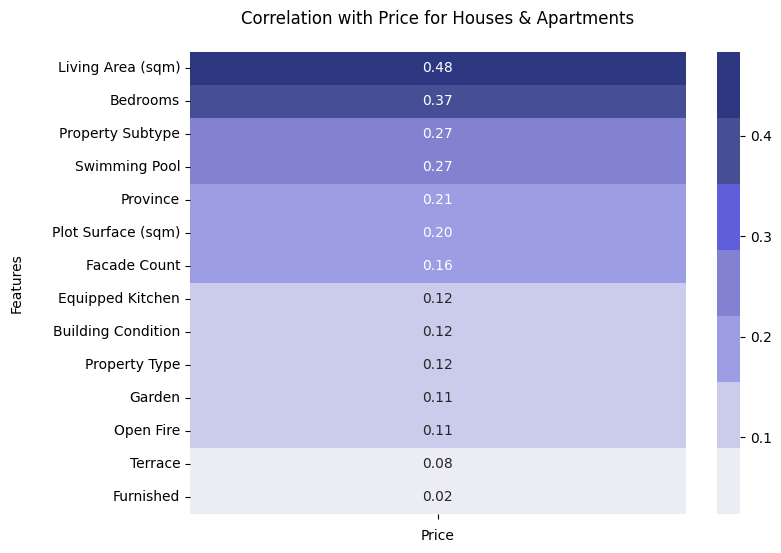

In [36]:
# Calculate the correlation matrix for all property types
corr_all_properties = num_df.corr().rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features
corr_price = corr_all_properties[['price']].drop(index='price')

# Sort features by correlation with price
corr_price = corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for all properties
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
heatmap.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Houses & Apartments", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=20)
plt.show()

#### Heatmap of Correlations between Price and Other Features (Houses & Apartments Separately)

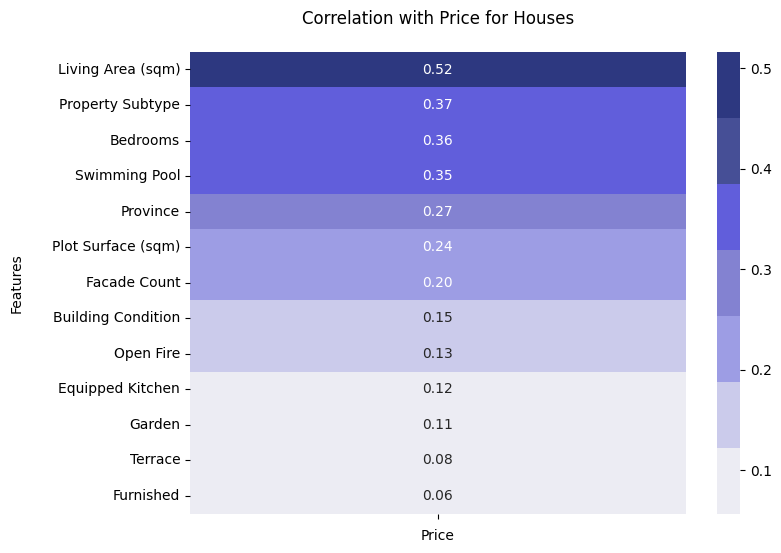

In [38]:
# Filter the DataFrame for houses (type_of_property == 1)
corr_houses = num_df[num_df['type_of_property'] == 1].corr() \
    .drop(index=['type_of_property'], columns=['type_of_property']) \
    .rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features for houses
houses_corr_price = corr_houses[['price']].drop(index='price')

# Sort features by correlation with price
houses_corr_price = houses_corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for houses
plt.figure(figsize=(8, 6))
graph5 = sns.heatmap(houses_corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
graph5.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Houses", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=20)
plt.show()

**Evaluation of Correlations Between Price and Other Features For Houses**

The most important features regarding price are:

* Living area (the bigger the more expensive)
* Property subtype (since we ordered the subtypes by mean price)
* Number of bedrooms (aligns with living area)
* Swimming Pool (which is correlated to living area)
* Province -> locality

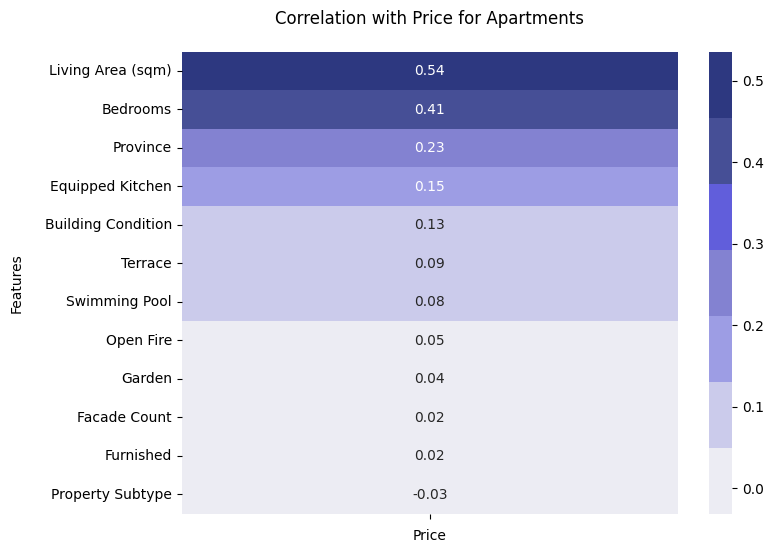

In [39]:
# Filter the DataFrame for apartments (type_of_property == 0)
corr_apartments = num_df[num_df['type_of_property'] == 0].corr() \
    .drop(index=['type_of_property', 'plot_surface'], columns=['type_of_property', 'plot_surface']) \
    .rename(index=custom_labels, columns=custom_labels)

# Select only correlations of 'price' with other features for apartments
apartments_corr_price = corr_apartments[['price']].drop(index='price')

# Sort features by correlation with price
apartments_corr_price = apartments_corr_price.sort_values(by='price', ascending=False)

# Plot heatmap for apartments
plt.figure(figsize=(8, 6))
graph6 = sns.heatmap(apartments_corr_price, annot=True, cmap=custom_cmap, fmt=".2f", cbar=True)

# Remove or adjust the x-axis label
graph6.set_xticklabels([''], rotation=0)  # Set to an empty string or rename it

plt.title("Correlation with Price for Apartments", pad=20)
plt.xlabel("Price")
plt.ylabel("Features", labelpad=15)
plt.show()

**Evaluation of Correlations Between Price and Other Features**

Most important Features for Apartments:

- Living area (same as houses)
- Bedrooms (same)
- Province (same correlatio index, but higher in rank)
- Features like equipped kitchen and building condition

Logically weaker correlations:
- Swimming pool, open fire, garden since as we saw, overall weak correlations for apartments

Interesting/ surprising:

- Subtype of property have a much bigger impact on the price for houses than for apartments, probably since the luxury and extraordinary properties such as castles, manors, villas, etc. which have a high weight on price are more prevalent among houses than apartments

#### Living area and price

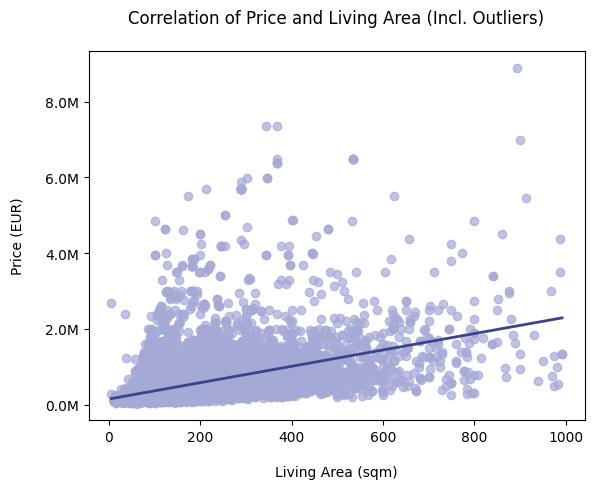

In [41]:
# Exploring relationships between price and other features (Price & Living Area incl. Outliers)

# Scatterplot with regression line
graph7 = sns.regplot(
    x="living_area",
    y="price",
    data=df,  # data
    scatter_kws={"color": "#a5a9d6", "alpha": 0.7},  # Dots with lighter matching color
    line_kws={"color": "#3a438b", "lw": 2},  # Regression line color and width
    ci=None  # Remove confidence interval shading
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Price (EUR)", labelpad=15)
plt.title("Correlation of Price and Living Area (Incl. Outliers)", pad=20)

# Show the plot
plt.show()

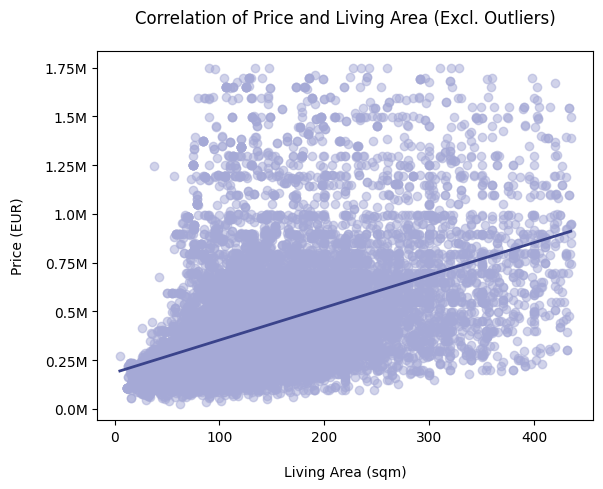

In [43]:
# Calculate mean and standard deviation for price
mean_price = statistics.mean(df["price"])
std_price = statistics.stdev(df["price"])

# Calculate mean and standard deviation for living area
mean_area = statistics.mean(df["living_area"])
std_area = statistics.stdev(df["living_area"])

# Define lower and upper bounds (price)
price_lower_bound = mean_price - 3 * std_price
price_upper_bound = mean_price + 3 * std_price

# Define lower and upper bounds (living area)
area_lower_bound = mean_area - 3 * std_area
area_upper_bound = mean_area + 3 * std_area

# Filter out outliers
filtered_df = df[
    (df["price"] >= price_lower_bound) & (df["price"] <= price_upper_bound) &
    (df["living_area"] >= area_lower_bound) & (df["living_area"] <= area_upper_bound)
]

# Scatterplot with regression line
graph8 = sns.regplot(
    x="living_area",
    y="price",
    data=filtered_df,  # Filtered data
    scatter_kws={"color": "#a5a9d6", "alpha": 0.5},  # Dots with lighter matching color
    line_kws={"color": "#3a438b", "lw": 2},  # Regression line color and width
    ci=None  # Remove confidence interval shading
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Price (EUR)", labelpad=15)
plt.title("Correlation of Price and Living Area (Excl. Outliers)", pad=20)

# Show the plot
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\3082676511.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = df.groupby("living_area_bin")["price"].mean().reset_index()


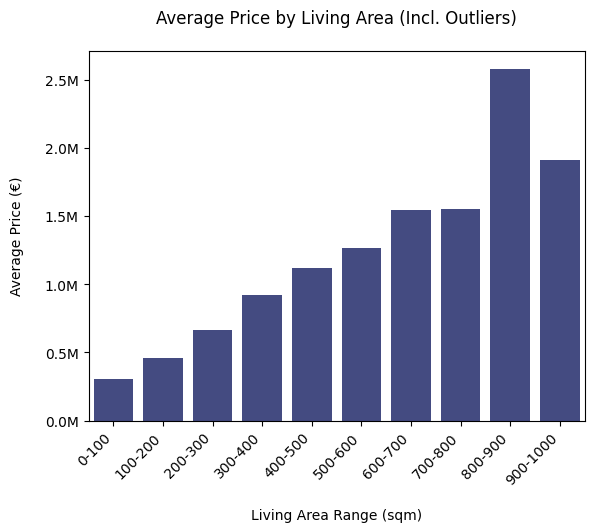

In [47]:
# Flatten bins

bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  
labels = ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", "800-900", "900-1000"]

df["living_area_bin"] = pd.cut(df["living_area"], bins=bins, labels=labels)

# Aggregate and plot
agg_data = df.groupby("living_area_bin")["price"].mean().reset_index()

graph9 = sns.barplot(
    x="living_area_bin",
    y="price",
    data=agg_data,
    color="#3a438b"  # Custom color for all bars
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and Title
plt.xticks(rotation=45, ha="right")
plt.title("Average Price by Living Area (Incl. Outliers)", pad=20)
plt.xlabel("Living Area Range (sqm)", labelpad=15)
plt.ylabel("Average Price (€)", labelpad=15)
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\4132577617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["living_area_bin"] = pd.cut(filtered_df["living_area"], bins=bins, labels=labels)
C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\4132577617.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = filtered_df.groupby("living_area_bin")["price"].mean().reset_index()


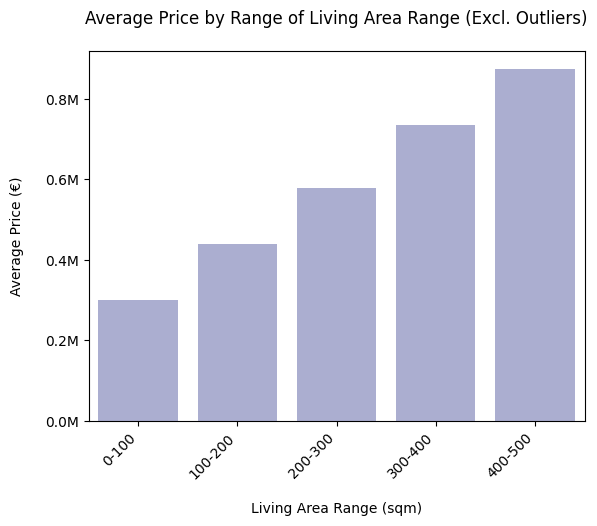

In [48]:
# Define bins and labels
bins = [0, 100, 200, 300, 400, 500]
labels = ["0-100", "100-200", "200-300", "300-400", "400-500"]

# Create living_area_bin column in the filtered DataFrame
filtered_df["living_area_bin"] = pd.cut(filtered_df["living_area"], bins=bins, labels=labels)

# Aggregate data using the filtered DataFrame
agg_data = filtered_df.groupby("living_area_bin")["price"].mean().reset_index()

# Bar plot
graph10 = sns.barplot(
    x="living_area_bin",
    y="price",
    data=agg_data,
    color="#a5a9d6"  # Custom bar color
)

# Format y-axis as millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{round(float(x / 1_000_000), 2)}M"))

# Labels and Title
plt.xticks(rotation=45, ha="right")
plt.title("Average Price by Range of Living Area Range (Excl. Outliers)", pad=20)
plt.xlabel("Living Area Range (sqm)", labelpad=15)
plt.ylabel("Average Price (€)", labelpad=15)

# Show the plot
plt.show()

### Histogram for number of properties according to their surface

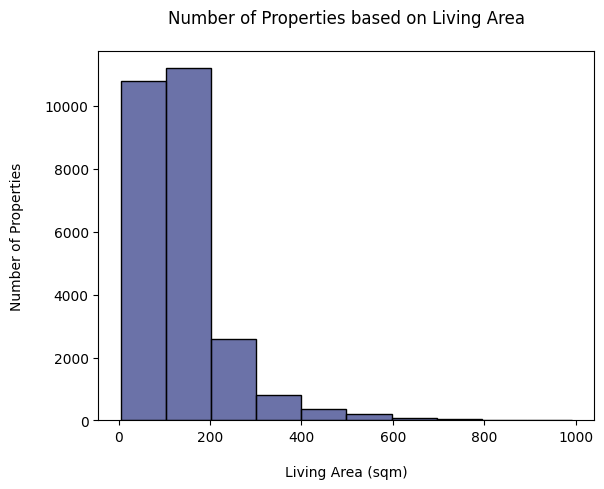

In [50]:
# Histogram for the distribution of living area
graph11 = sns.histplot(df["living_area"], kde=False, bins=10, color="#3a438b")  # Adjust bins for granularity

# Adding labels and title
plt.xlabel("Living Area (sqm)", labelpad=15)
plt.ylabel("Number of Properties", labelpad=15)
plt.title("Number of Properties based on Living Area", pad=20)

# Show the plot
plt.show()

## Regional Price Analysis

### Property and square meter price per province

In [ ]:
#Adding price per square meter column to dataset
df['price_per_sm'] = df['price'] / df['living_area']

#### Mean price per province graph

##### All properties

In [53]:
#Defining dataset to be graphed
to_graf_mean_province_price = df.groupby(['province']).price.mean().round().to_frame().sort_values(by='price', ascending=False)
to_graf_mean_province_price.reset_index()

,province,price
0,West-Vlaanderen,598714.0
1,Bruxelles,516521.0
2,Vlaams Brabant,496249.0
3,Brabant Wallon,493624.0
4,Antwerpen,448171.0
5,Oost-Vlaanderen,420434.0
6,Limburg,382703.0
7,Luxembourg,329748.0
8,Namur,300208.0
9,Liège,289053.0


C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\1671532080.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph12.set_xticklabels(xlabels)
C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\1671532080.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  graph12.text(to_graf_mean_province_price['price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')


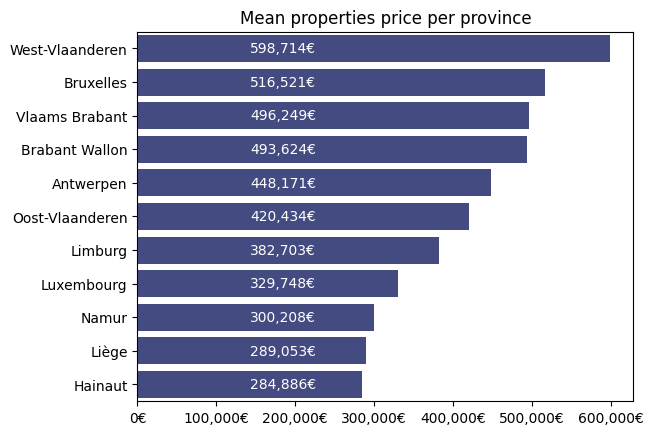

In [ ]:
#Defining graph
graph12 = sns.barplot(data=to_graf_mean_province_price , x='price', y='province', color='#3a438b')
graph12.set(xlabel=None)
graph12.set(ylabel=None)
plt.title('Mean properties price per province')
ticks = graph12.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
graph12.set_xticklabels(xlabels)

#Applying lables to bars
for i, v in enumerate(to_graf_mean_province_price['price']):
    graph12.text(to_graf_mean_province_price['price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')

##### By property type

In [55]:
#Defining dataset to graph
to_graf_mean_province_price_ptype = df.groupby(['province', 'type_of_property']).price.mean().round().to_frame()

to_graf_mean_province_price_ptype = to_graf_mean_province_price_ptype.reset_index()
apartments_df = (to_graf_mean_province_price_ptype[to_graf_mean_province_price_ptype.type_of_property == 0].sort_values(['price'], ascending=False))
province_list = apartments_df['province'].tolist()
houses_df = to_graf_mean_province_price_ptype[to_graf_mean_province_price_ptype.type_of_property == 1].sort_values(by='province', key=lambda col: col.map(lambda e:province_list.index(e)))
to_graf_mean_province_price_ptype = pd.concat([apartments_df, houses_df])
to_graf_mean_province_price_ptype.rename(columns={'type_of_property': 'property type'}, inplace=True)
to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 0, 'property type'] = 'apartements'
to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 1, 'property type'] = 'houses'

C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\4294833477.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'apartements' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 0, 'property type'] = 'apartements'


C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\4059446648.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph13.set_xticklabels(xlabels)


[Text(0.0, 0, '0'),
 Text(100000.0, 0, '100,000'),
 Text(200000.0, 0, '200,000'),
 Text(300000.0, 0, '300,000'),
 Text(400000.0, 0, '400,000'),
 Text(500000.0, 0, '500,000'),
 Text(600000.0, 0, '600,000'),
 Text(700000.0, 0, '700,000'),
 Text(800000.0, 0, '800,000'),
 Text(900000.0, 0, '900,000')]

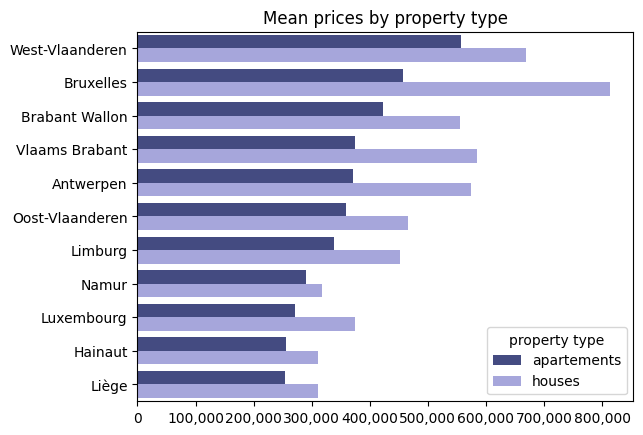

In [56]:
graph13 = sns.barplot(data=to_graf_mean_province_price_ptype, x='price', y='province', hue='property type', palette=['#3a438b', '#9D9DE4'])
graph13.set(xlabel=None)
graph13.set(ylabel=None)
plt.title('Mean prices by property type')

ticks = graph13.get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
graph13.set_xticklabels(xlabels)

#### Mean square meter per province graphs

##### All properties

In [57]:
# defining dataset to graph
to_graf_mean_province_sqm_price = df.groupby(['province']).price_per_sm.mean().round().to_frame().sort_values(by='price_per_sm', ascending=False)
to_graf_mean_province_sqm_price.rename(columns={'price_per_sm': 'sqm price'}, inplace=True)

C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\909366893.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph14.set_xticklabels(xlabels)
C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\909366893.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  graph14.text(to_graf_mean_province_sqm_price['sqm price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')


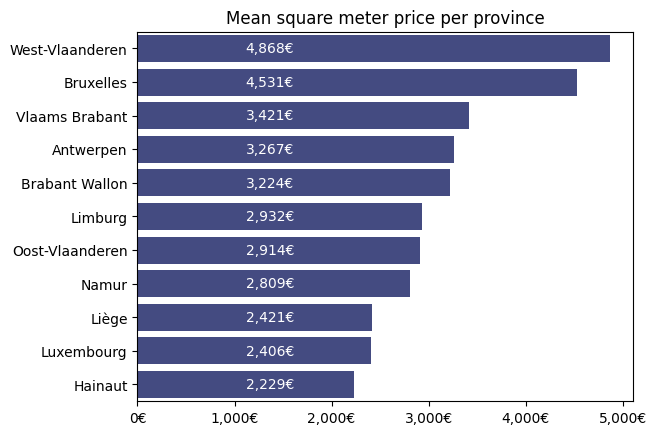

In [ ]:
graph14 = sns.barplot(data=to_graf_mean_province_sqm_price , x='sqm price', y='province', color='#3a438b')
graph14.set(xlabel=None)
graph14.set(ylabel=None)
plt.title('Mean square meter price per province')
ticks = graph14.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
graph14.set_xticklabels(xlabels)

# Adding bar descriptions
for i, v in enumerate(to_graf_mean_province_sqm_price['sqm price']):
    graph14.text(to_graf_mean_province_sqm_price['sqm price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')

##### By property type

In [ ]:
# Defining dataset to graph
to_graf_mean_province_sqm_price_ptype = df.groupby(['province', 'type_of_property']).price_per_sm.mean().round().to_frame()

to_graf_mean_province_sqm_price_ptype = to_graf_mean_province_sqm_price_ptype.reset_index()
apartments_df = (to_graf_mean_province_sqm_price_ptype[to_graf_mean_province_sqm_price_ptype.type_of_property == 0].sort_values(['price_per_sm'], ascending=False))
province_list = apartments_df['province'].tolist()
houses_df = to_graf_mean_province_sqm_price_ptype[to_graf_mean_province_sqm_price_ptype.type_of_property == 1].sort_values(by='province', key=lambda col: col.map(lambda e:province_list.index(e)))
to_graf_mean_province_sqm_price_ptype = pd.concat([apartments_df, houses_df])
to_graf_mean_province_sqm_price_ptype.rename(columns={'type_of_property': 'property type', 'price_per_sm': 'sqm price'}, inplace=True)
to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 0, 'property type'] = 'apartements'
to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 1, 'property type'] = 'houses'

C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\3474717106.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'apartements' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 0, 'property type'] = 'apartements'


C:\Users\aleks\AppData\Local\Temp\ipykernel_10928\669663350.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph15.set_xticklabels(xlabels)


[Text(0.0, 0, '0€'),
 Text(1000.0, 0, '1,000€'),
 Text(2000.0, 0, '2,000€'),
 Text(3000.0, 0, '3,000€'),
 Text(4000.0, 0, '4,000€'),
 Text(5000.0, 0, '5,000€'),
 Text(6000.0, 0, '6,000€'),
 Text(7000.0, 0, '7,000€')]

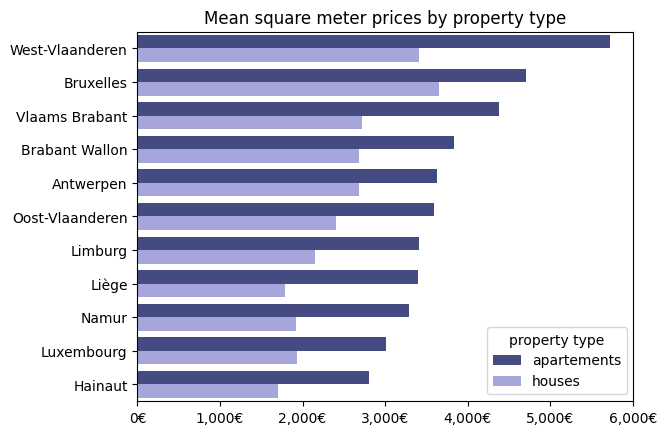

In [60]:
graph15 = sns.barplot(data=to_graf_mean_province_sqm_price_ptype, x='sqm price', y='province', hue='property type', palette=['#3a438b', '#9D9DE4'])
graph15.set(xlabel=None)
graph15.set(ylabel=None)
plt.title('Mean square meter prices by property type')

ticks = graph15.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
graph15.set_xticklabels(xlabels)